In [1]:
"""LECTURA DE DATAFRAME ,FILTRADO DE COLUMNAS DE INTERES Y CREACION DE DUMMIES"""
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm

data = pd.read_csv('../desafio_ds/df_clean.csv')
cols = ['property_type', 'place_name',  'state_name' ,\
 'surface_total_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses',\
 'pileta|piscina', 'terraza|solarium', 'cochera|garage', 'patio|jardin', 'laundry|lavadero', \
 'parrilla|churrasquera|asadera', 'amenities']
df = data[cols]

In [2]:
"""REVISO SI LAS FEATURES TIENEN CORRELACION ALTA CON EL TARGET"""
def corr_filter(df,y= 'price_usd_per_m2', val=0.001):
    df_aux = pd.get_dummies(df, drop_first=True)
    x = df_aux.drop(y, axis = 1)
    lista = []
    for i in x.columns:
        corr = df_aux[[y,i]].corr()
        if corr.iloc[0][i] > abs(val):
            lista.append(i)
    return lista

lista = corr_filter(df,y= 'price_usd_per_m2', val=0.2)
print('FEATURES CON COFICIENTE DE CORRELACION > 0.2: {0}'.format(lista))
print('TOTAL DE FEATURES CORRELACION > 0.2: {0}'.format(len(lista)))

FEATURES CON COFICIENTE DE CORRELACION > 0.2: ['floor', 'property_type_apartment', 'place_name_Palermo', 'place_name_Puerto Madero', 'state_name_Capital Federal']
TOTAL DE FEATURES CORRELACION > 0.2: 5


In [3]:
def aplico_ridge(df,state_name):
    lista = []
    if type(state_name) == str:
        lista.append(state_name)
    else:
        lista = state_name
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                          0.05], normalize=True, cv=5)
    df = df[df['state_name'].isin(lista)]
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop('price_usd_per_m2',axis=1)
    y = df['price_usd_per_m2']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
    lm_ridge.fit(X_train, y_train)
    y_predicted = lm_ridge.predict(X_test)

    print("Best alpha using built-in RidgeCV: %f" % lm_ridge.alpha_)
    print("Best score using built-in RidgeCV: %f" %lm_ridge.score(X,y))
    coef = pd.Series(lm_ridge.coef_, index = X.columns)
    print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    imp_coef = coef.sort_values()
    plt.rcParams['figure.figsize'] = (15.0, 20.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Ridge Model")

In [9]:
"""TEST CON LASSO"""
def aplico_lasso(df,state_name):
    lista = []
    if type(state_name) == str:
        lista.append(state_name)
    else:
        lista = state_name
        
    df = df[df['state_name'].isin(lista)]
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop('price_usd_per_m2',axis=1)
    y = df['price_usd_per_m2']
    reg = LassoCV(alphas=[0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                            0.05],\
                                            normalize=True, cv=5,max_iter=15000)
    reg.fit(X, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y))
    coef = pd.Series(reg.coef_, index = X.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    imp_coef = coef.sort_values()
    plt.rcParams['figure.figsize'] = (15.0, 20.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")

Best alpha using built-in LassoCV: 0.005000
Best score using built-in LassoCV: 0.581664
Lasso picked 524 variables and eliminated the other 99 variables


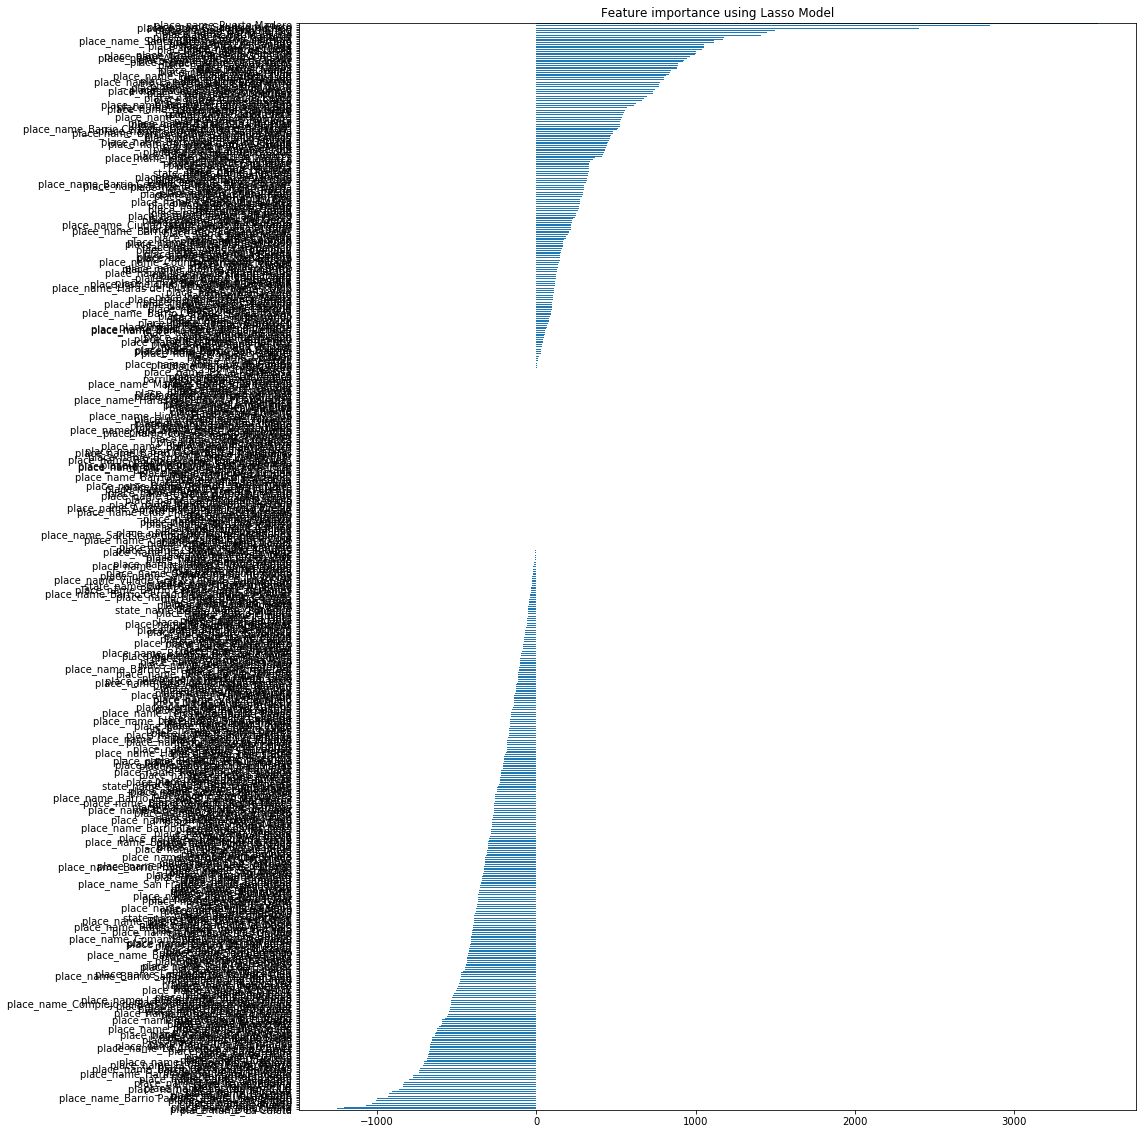

In [10]:
#EJECUTO EL MODELO DE RIDGE Y LASSO CON DISTINTOS DISTRITOS
#aplico_lasso(df,df["state_name"].to_list())
#aplico_ridge(df,df["state_name"].to_list())
#aplico_lasso(df,'Capital Federal')
#aplico_ridge(df,'Capital Federal')
aplico_lasso(df,['Capital Federal','Buenos Aires Interior','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste'])


Best alpha using built-in RidgeCV: 0.000010
Best score using built-in RidgeCV: 0.578991
Ridge picked 596 variables and eliminated the other 27 variables


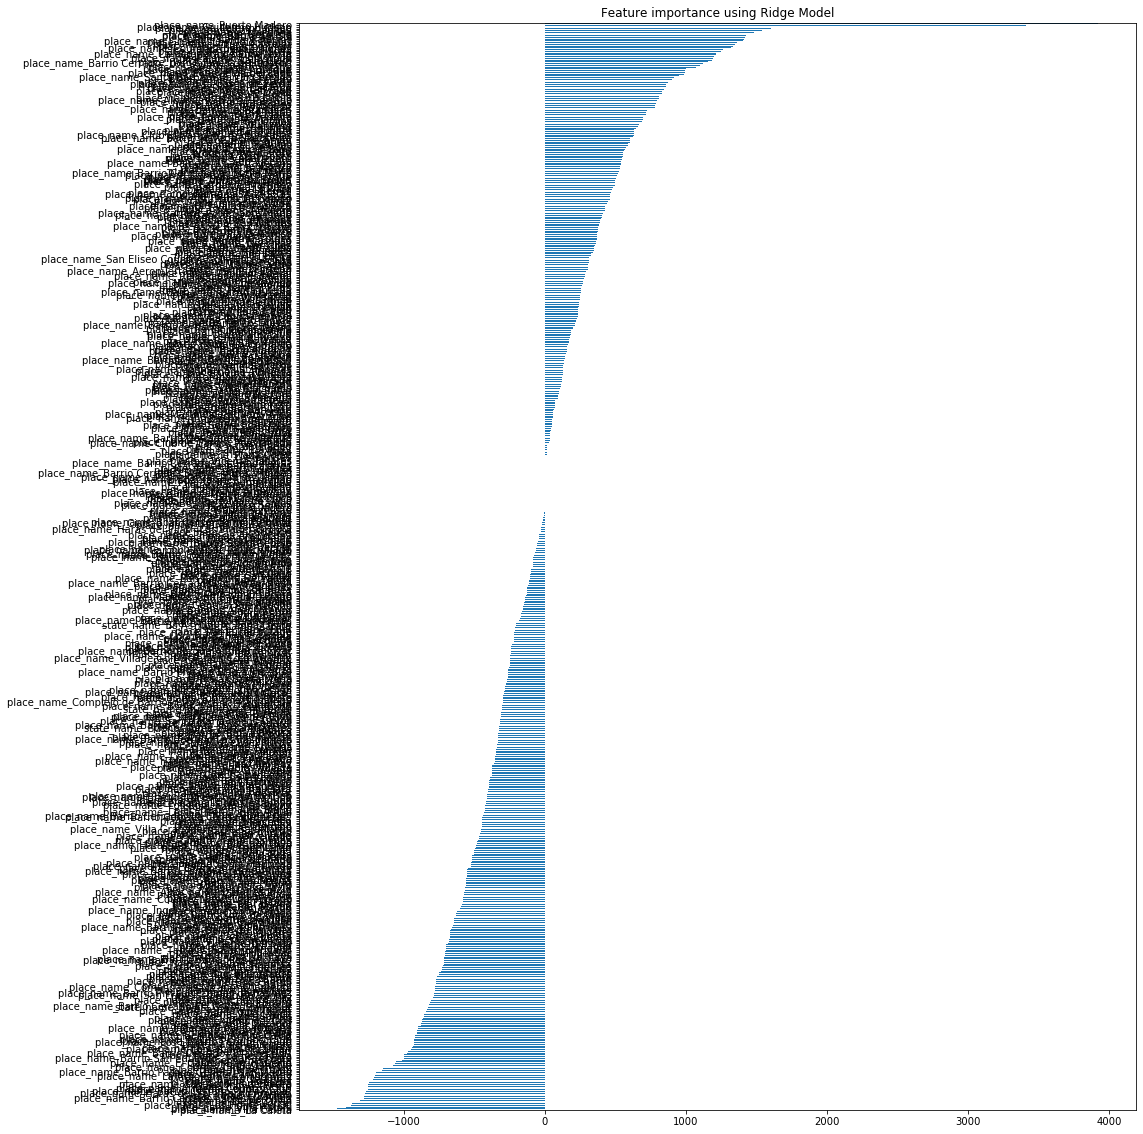

In [6]:
aplico_ridge(df,['Capital Federal','Buenos Aires Interior','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste'])
